In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#240 eV-ra a Bragg görbe kirajzolása

# A fájl elérési útvonalának megadása
file_path = '-5 cm fej fantom/1720699573_afa034ab-1f86-447b-84e6-37a7b0b0b34e_head_10000Primaries_1.hits.npy'

# A fájl beolvasása numpy tömbként
data240eV = np.load(file_path)

# A numpy tömb konvertálása pandas DataFrame-é
df240eV = pd.DataFrame(data200eV)

# Az adatok megjelenítése
print(df240eV.head())

   PDGEncoding  trackID  parentID          time  eventID      posX      posY  \
0         2212        1         0  4.139427e-09        0  3.164226  2.472105   
1         2212        1         0  4.496868e-09        0  3.280765  2.902629   
2         2212        1         0  4.762924e-09        0  3.225525  3.343086   
3         2212        1         0  4.797165e-09        0  3.203239  3.394674   
4         2212        1         0  4.831740e-09        0  3.165427  3.454047   

         posZ   momDirX   momDirY  ...  volumeID[0]  volumeID[1]  volumeID[2]  \
0  225.354004  0.000177  0.004430  ...            0            1            0   
1  283.153992 -0.000381  0.007175  ...            0            1            0   
2  326.093994 -0.001980  0.008069  ...            0            1            1   
3  331.593994 -0.008184  0.010979  ...            0            1            1   
4  337.093994 -0.006191  0.013465  ...            0            1            1   

   volumeID[3]  volumeID[4]  vol

In [9]:
#240 eV-ra a Bragg görbe kirajzolása

# A fájl elérési útvonalának megadása
file_path = '-10 cm fej fantom/1720861996_07aed053-f3e2-48ae-bf35-7df0d7f86a27_head_100000Primaries_1.hits.npy'

# A fájl beolvasása numpy tömbként
data240eV = np.load(file_path)

# A numpy tömb konvertálása pandas DataFrame-é
df240eV = pd.DataFrame(data200eV)

# Az adatok megjelenítése
print(df240eV.head())

   PDGEncoding  trackID  parentID          time  eventID      posX      posY  \
0         2212        1         0  4.139427e-09        0  3.164226  2.472105   
1         2212        1         0  4.496868e-09        0  3.280765  2.902629   
2         2212        1         0  4.762924e-09        0  3.225525  3.343086   
3         2212        1         0  4.797165e-09        0  3.203239  3.394674   
4         2212        1         0  4.831740e-09        0  3.165427  3.454047   

         posZ   momDirX   momDirY  ...  volumeID[0]  volumeID[1]  volumeID[2]  \
0  225.354004  0.000177  0.004430  ...            0            1            0   
1  283.153992 -0.000381  0.007175  ...            0            1            0   
2  326.093994 -0.001980  0.008069  ...            0            1            1   
3  331.593994 -0.008184  0.010979  ...            0            1            1   
4  337.093994 -0.006191  0.013465  ...            0            1            1   

   volumeID[3]  volumeID[4]  vol

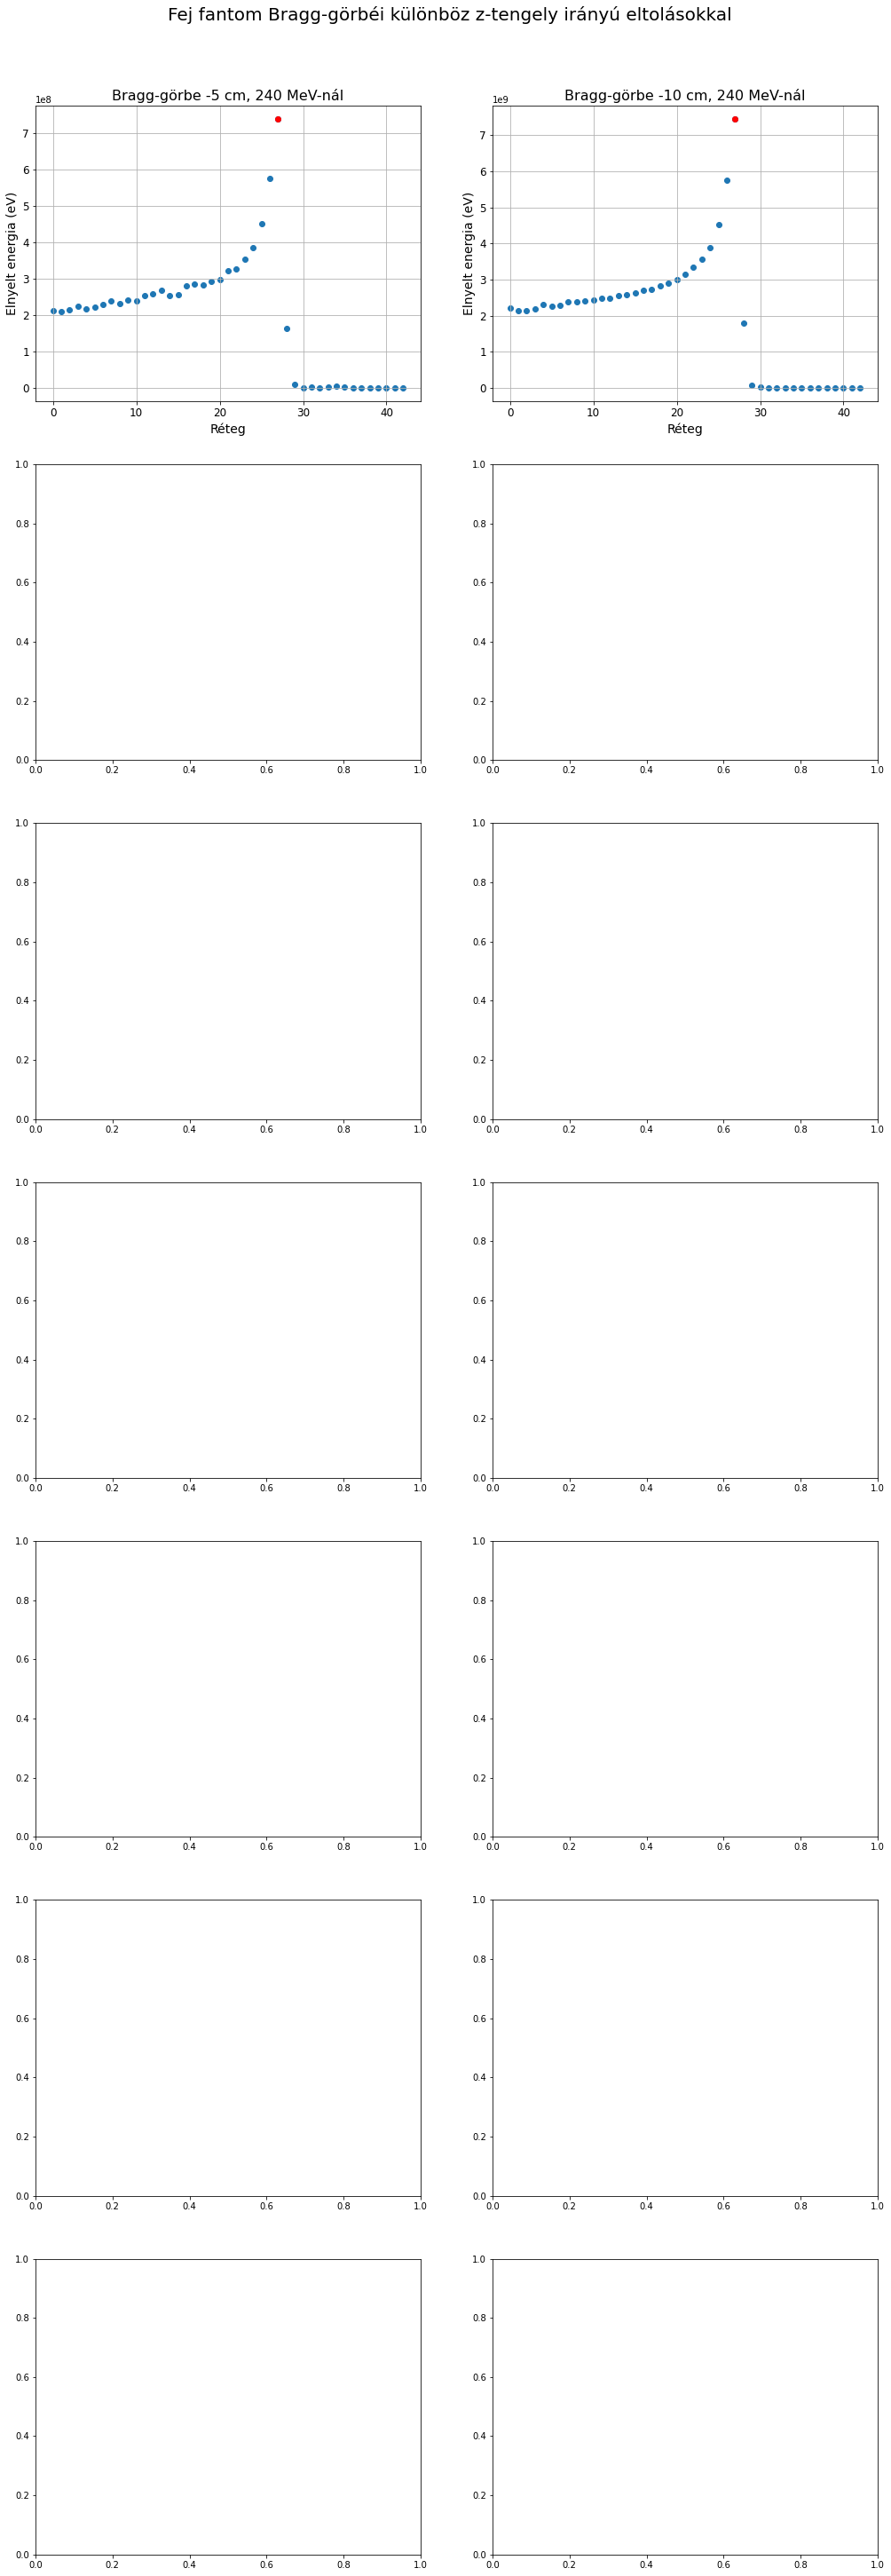

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# A fájlnevek és azok teljes elérési útvonalainak listája
file_paths = [
    # Fájl elérési útvonalak...
    '-5 cm fej fantom/1720699573_afa034ab-1f86-447b-84e6-37a7b0b0b34e_head_10000Primaries_1.hits.npy',
    '-10 cm fej fantom/1720861996_07aed053-f3e2-48ae-bf35-7df0d7f86a27_head_100000Primaries_1.hits.npy',
    
]

# Az energiaértékek listája, megfeleltetve a fájlnevekkel
energy_values = [
    # Energiaértékek...
    '-5 cm, 240 MeV', '-10 cm, 240 MeV'
]

# Grafikonok beállítása
fig, axs = plt.subplots(7, 2, figsize=(15, 40))  # Méret módosítása, hogy minden grafikon elférjen
fig.tight_layout(pad=5.0)  # Több hely biztosítása
fig.suptitle('Fej fantom Bragg-görbéi különböz z-tengely irányú eltolásokkal', fontsize=20, y=1.02)  # Központi cím hozzáadása

for idx, (file_path, energy) in enumerate(zip(file_paths, energy_values)):
    ax = axs[idx // 2, idx % 2]

    data = np.load(file_path)
    df = pd.DataFrame(data)
    df['Layer'] = 2*df["volumeID[2]"] + df["volumeID[3]"]
    
    Layers = df.Layer.unique()
    Myenergy = np.zeros(len(Layers))
    for i, k in enumerate(Layers):
        Myenergy[i] = (df[df.Layer == k]["edep"].sum()) * 1e6  # Az energiát MeV-ből eV-be konvertáljuk
    
    # A Bragg-csúcs megkeresése
    max_energy_index = Myenergy.argmax()
    max_layer = Layers[max_energy_index]
    max_energy = Myenergy[max_energy_index]
    
    # Scatter plot rajzolása
    ax.scatter(Layers, Myenergy)
    # A Bragg-csúcs kiemelése piros ponttal
    ax.scatter(max_layer, max_energy, color='red')
    
    ax.set_xlabel('Réteg', fontsize=14)
    ax.set_ylabel('Elnyelt energia (eV)', fontsize=14)  # Megjegyzés a változtatásra
    ax.set_title(f'Bragg-görbe {energy}-nál', fontsize=16)
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()


Fájl: -5 cm fej fantom/1720699573_afa034ab-1f86-447b-84e6-37a7b0b0b34e_head_10000Primaries_1.hits.npy
[(2212,  1, 0, 4.13942748e-09,    0,  3.1642256,   2.4721048, 225.354,  0.00017691,  0.00442995, 0.99999017, 0.03465859, 0, 1, 0, 0, 3, -1, -1, -1, -1, -1)
 (2212,  1, 0, 4.49686845e-09,    0,  3.2807648,   2.902629 , 283.154, -0.00038102,  0.0071748 , 0.9999742 , 0.0622928 , 0, 1, 0, 1, 3, -1, -1, -1, -1, -1)
 (2212,  1, 0, 4.76292437e-09,    0,  3.2255254,   3.343086 , 326.094, -0.00198045,  0.00806933, 0.9999655 , 0.02114849, 0, 1, 1, 0, 3, -1, -1, -1, -1, -1)
 ...
 (2212, 14, 1, 6.00941478e-09, 9999, 35.11137  , -35.950474 , 283.154,  0.11503439, -0.10562923, 0.9877295 , 0.08271385, 0, 1, 0, 1, 3, -1, -1, -1, -1, -1)
 (2212, 14, 1, 6.55192519e-09, 9999, 39.59475  , -40.45385  , 326.094,  0.1143293 , -0.12675072, 0.98532385, 0.08744557, 0, 1, 1, 0, 3, -1, -1, -1, -1, -1)
 (2212, 14, 1, 6.63428463e-09, 9999, 40.082397 , -41.090687 , 331.594,  0.07345018, -0.07230874, 0.9946741 , 0.22

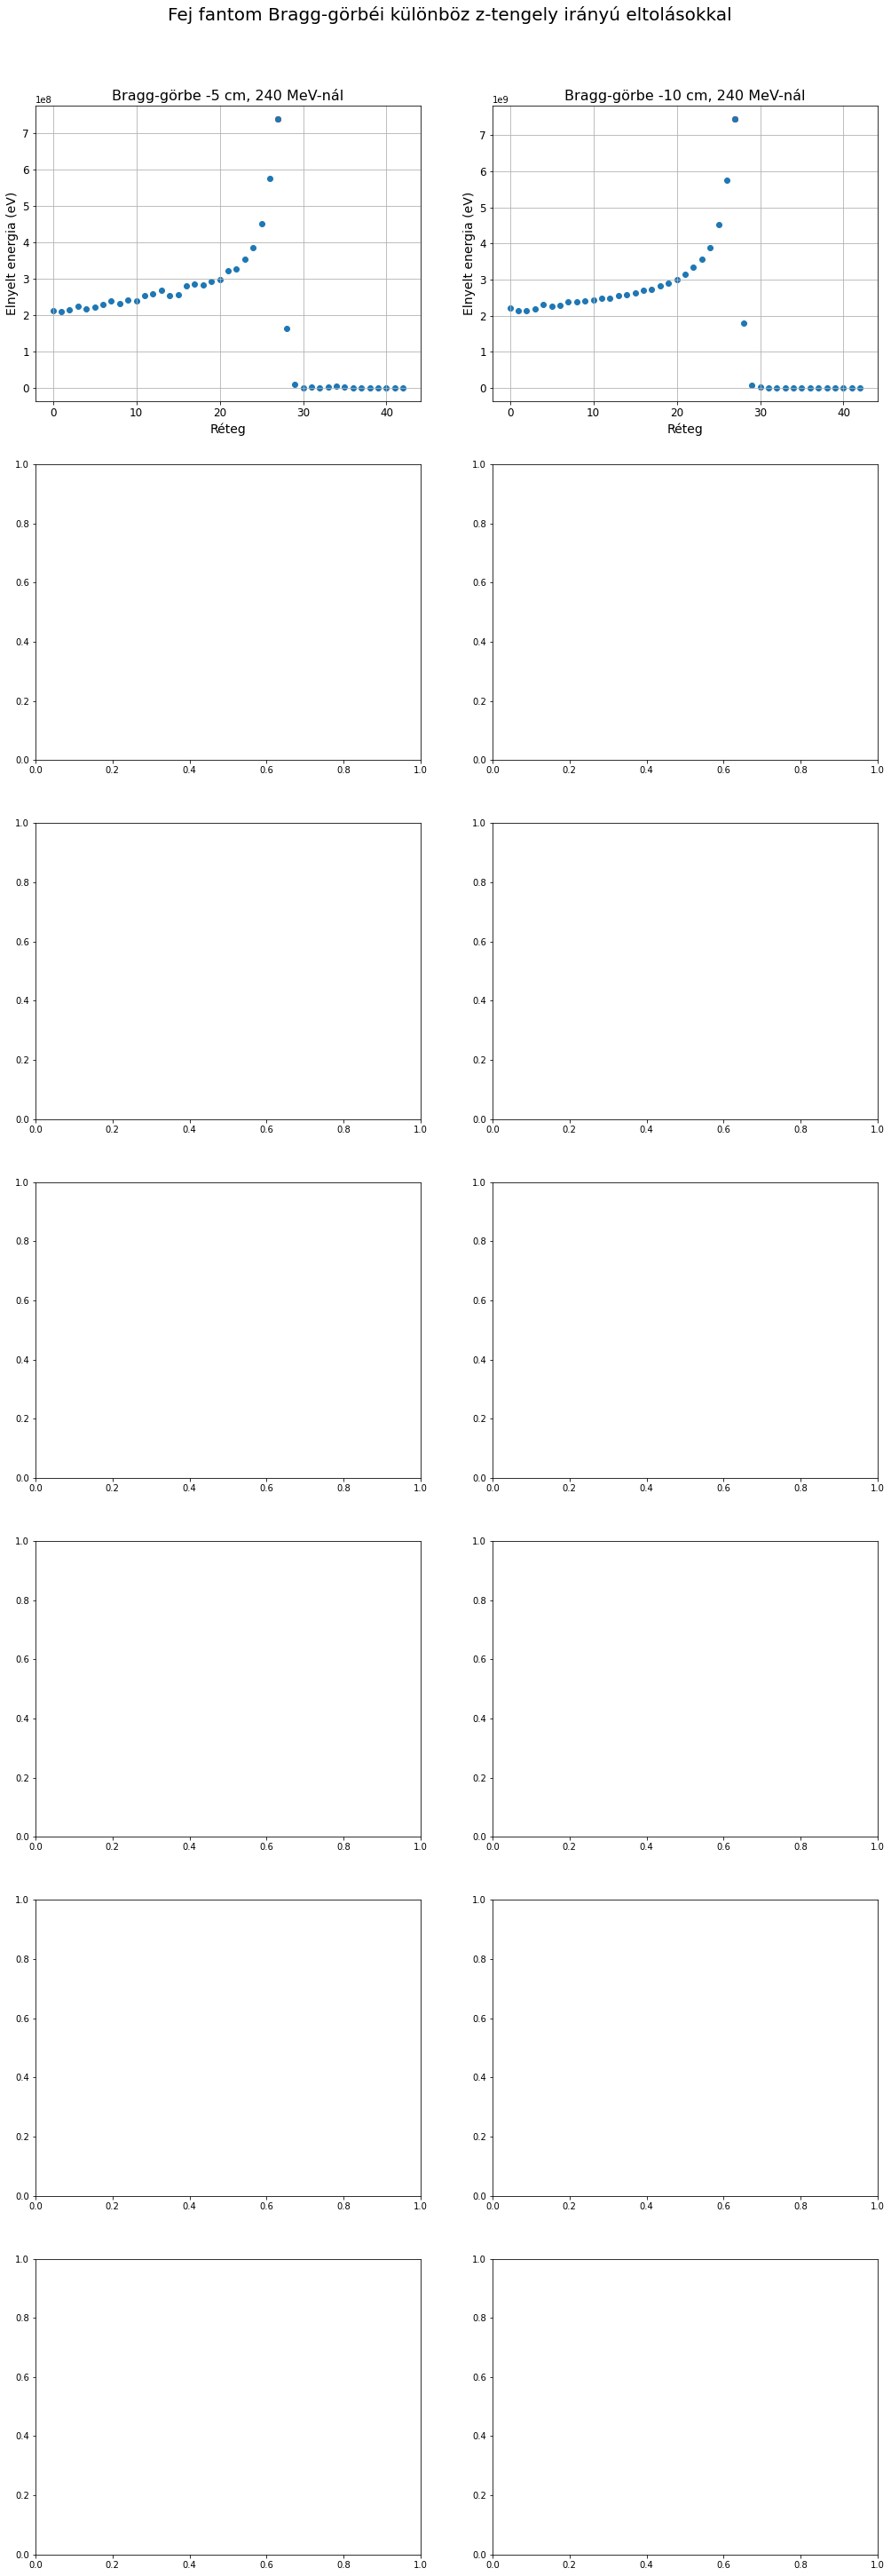

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# A fájlnevek és azok teljes elérési útvonalainak listája
file_paths = [
    '-5 cm fej fantom/1720699573_afa034ab-1f86-447b-84e6-37a7b0b0b34e_head_10000Primaries_1.hits.npy',
    '-10 cm fej fantom/1720861996_07aed053-f3e2-48ae-bf35-7df0d7f86a27_head_100000Primaries_1.hits.npy',
]

# Az energiaértékek listája, megfeleltetve a fájlnevekkel
energy_values = [
    '-5 cm, 240 MeV', '-10 cm, 240 MeV'
]

# Grafikonok beállítása
fig, axs = plt.subplots(7, 2, figsize=(15, 40))  # Méret módosítása, hogy minden grafikon elférjen
fig.tight_layout(pad=5.0)  # Több hely biztosítása
fig.suptitle('Fej fantom Bragg-görbéi különböz z-tengely irányú eltolásokkal', fontsize=20, y=1.02)  # Központi cím hozzáadása

for idx, (file_path, energy) in enumerate(zip(file_paths, energy_values)):
    ax = axs[idx // 2, idx % 2]

    data = np.load(file_path)
    print(f"Fájl: {file_path}")
    print(data)

    df = pd.DataFrame(data)
    print(df.columns)
    
    if 'volumeID[2]' in df.columns and 'volumeID[3]' in df.columns:
        df['Layer'] = 2 * df["volumeID[2]"] + df["volumeID[3]"]
        Layers = df.Layer.unique()
        Myenergy = np.zeros(len(Layers))
        for i, k in enumerate(Layers):
            Myenergy[i] = (df[df.Layer == k]["edep"].sum()) * 1e6  # Az energiát MeV-ből eV-be konvertáljuk
        
        if len(Myenergy) > 0:
            max_energy_index = Myenergy.argmax()
            max_layer = Layers[max_energy_index]
            max_energy = Myenergy[max_energy_index]
            ax.scatter(max_layer, max_energy, color='red')
        else:
            print(f"Üres Myenergy a fájlban: {file_path}")
        
        # Scatter plot rajzolása
        ax.scatter(Layers, Myenergy)
        ax.set_xlabel('Réteg', fontsize=14)
        ax.set_ylabel('Elnyelt energia (eV)', fontsize=14)  # Megjegyzés a változtatásra
        ax.set_title(f'Bragg-görbe {energy}-nál', fontsize=16)
        ax.grid(True)
        ax.tick_params(axis='both', which='major', labelsize=12)
    else:
        print(f'Hiányzó oszlopok a fájlban: {file_path}')

plt.show()
